In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset = "swed"  # "swed"

In [9]:
df_hydro = pd.read_csv(f"{dataset}_hydro_msi_1.csv", index_col=0)
df_swinv2_imagenet = pd.read_csv(f"{dataset}_unet_swinv2_imagenet_msi_1.csv", index_col=0)
df_resnet50_imagenet = pd.read_csv(f"{dataset}_unet_resnet50_msi_1.csv", index_col=0)
df_swinv2_satlas = pd.read_csv(f"{dataset}_unet_swinv2_satlas_msi_1.csv", index_col=0)

In [10]:
# Calculate means and standard deviations for df_hydro
pivot_hydro = df_hydro.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
results_hydro_xs = pivot_hydro.index.values.squeeze()
results_hydro_means = pivot_hydro['mean'].values.squeeze()
results_hydro_stds = pivot_hydro['std'].values.squeeze()

# Calculate means and standard deviations for df_swinv2_imagenet
pivot_swinv2_imagenet = df_swinv2_imagenet.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
results_swinv2_imagenet_xs = pivot_swinv2_imagenet.index.values.squeeze()
results_swinv2_imagenet_means = pivot_swinv2_imagenet['mean'].values.squeeze()
results_swinv2_imagenet_stds = pivot_swinv2_imagenet['std'].values.squeeze()

# Calculate means and standard deviations for df_resnet50_imagenet
pivot_resnet50_imagenet = df_resnet50_imagenet.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
results_resnet50_imagenet_xs = pivot_resnet50_imagenet.index.values.squeeze()
results_resnet50_imagenet_means = pivot_resnet50_imagenet['mean'].values.squeeze()
results_resnet50_imagenet_stds = pivot_resnet50_imagenet['std'].values.squeeze()

# Calculate means and standard deviations for df_swinv2_satlas
pivot_swinv2_satlas = df_swinv2_satlas.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
results_swinv2_satlas_xs = pivot_swinv2_satlas.index.values.squeeze()
results_swinv2_satlas_means = pivot_swinv2_satlas['mean'].values.squeeze()
results_swinv2_satlas_stds = pivot_swinv2_satlas['std'].values.squeeze()


/tmp/ipykernel_404953/67929942.py:2: FutureWarning: The provided callable <function mean at 0x7f4540368cc0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_hydro = df_hydro.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
/tmp/ipykernel_404953/67929942.py:2: FutureWarning: The provided callable <function std at 0x7f4540368e00> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_hydro = df_hydro.pivot_table(values='test_OverallIoU', index='train_fraction', aggfunc=[np.mean, np.std])
/tmp/ipykernel_404953/67929942.py:8: FutureWarning: The provided callable <function mean at 0x7f4540368cc0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will b

In [11]:
results_hydro_xs

array([5.e-05, 1.e-04, 2.e-04, 5.e-04, 1.e-03, 5.e-03, 1.e-02])

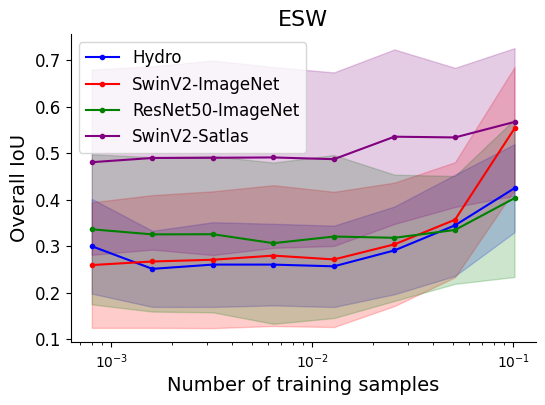

In [7]:
plt.figure(figsize=(6, 4))
ax = plt.gca()

plt.plot(results_hydro_xs, results_hydro_means, marker=".", label="Hydro", color='blue')
plt.fill_between(results_hydro_xs, results_hydro_means - results_hydro_stds, results_hydro_means + results_hydro_stds, color='blue', alpha=0.2)

plt.plot(results_swinv2_imagenet_xs, results_swinv2_imagenet_means, marker=".", label="SwinV2-ImageNet", color='red')
plt.fill_between(results_swinv2_imagenet_xs, results_swinv2_imagenet_means - results_swinv2_imagenet_stds, results_swinv2_imagenet_means + results_swinv2_imagenet_stds, color='red', alpha=0.2)

plt.plot(results_resnet50_imagenet_xs, results_resnet50_imagenet_means, marker=".", label="ResNet50-ImageNet", color='green')
plt.fill_between(results_resnet50_imagenet_xs, results_resnet50_imagenet_means - results_resnet50_imagenet_stds, results_resnet50_imagenet_means + results_resnet50_imagenet_stds, color='green', alpha=0.2)

plt.plot(results_swinv2_satlas_xs, results_swinv2_satlas_means, marker=".", label="SwinV2-Satlas", color='purple')
plt.fill_between(results_swinv2_satlas_xs, results_swinv2_satlas_means - results_swinv2_satlas_stds, results_swinv2_satlas_means + results_swinv2_satlas_stds, color='purple', alpha=0.2)

plt.xlabel("Number of training samples", fontsize=14)
plt.ylabel("Overall IoU", fontsize=14)
#plt.xticks(results_hydro_xs, [1,2,5,13,26], fontsize=12)
plt.yticks(fontsize=12)
plt.xscale("log")

plt.title("ESW", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.close()
